In [17]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [5]:
datacube=fits.open('NGC2487.V500.rscube.fits')

In [8]:
datacube.info()

Filename: NGC2487.V500.rscube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     540   (78, 72, 1877)   float32   
  1  ERROR         1 ImageHDU         9   (78, 72, 1877)   float32   
  2  ERRWEIGHT     1 ImageHDU         9   (78, 72, 1877)   float32   
  3  BADPIX        1 ImageHDU         9   (78, 72, 1877)   uint8   
  4  FIBCOVER      1 ImageHDU         9   (78, 72, 1877)   uint8   
  5  FLAT          1 ImageHDU        40   (78, 72)   float32   


In [9]:
data3d=datacube[0].data

In [10]:
data3d.shape

(1877, 72, 78)

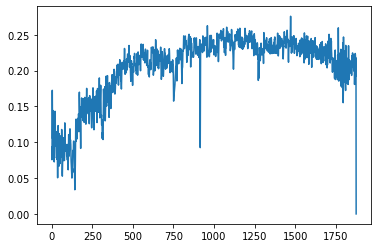

In [16]:
plt.plot(data3d[:,36,36])

In [18]:
Ndim=data3d.shape

In [19]:
Ndim

(1877, 72, 78)

In [83]:
data2d=data3d.reshape(Ndim[0],Ndim[1]*Ndim[2]).T
data2d.shape

(5616, 1877)

In [85]:
n_comp=10
pca = PCA(n_components=n_comp)

In [86]:
mypca=pca.fit(data2d)

In [87]:
evals=mypca.explained_variance_ratio_  #engevalues
engev=mypca.components_ #enge vector

In [95]:
""" Projection """
comp = pca.components_ 
X_train_pca = pca.fit_transform(data2d)
com_tr = np.transpose(pca.components_) 
proj = np.dot(data2d,com_tr) 
recon = np.dot(proj,comp) 

eng values 0 : 0.9355593904215395
eng values 1 : 0.01615620105099882
eng values 2 : 0.00990104126095352
eng values 3 : 0.0038520974728628184
eng values 4 : 0.003664344672449407
eng values 5 : 0.002304645779331919
eng values 6 : 0.001623803334322799
eng values 7 : 0.001450454020872164
eng values 8 : 0.001169631375524737
eng values 9 : 0.0011604951943806254


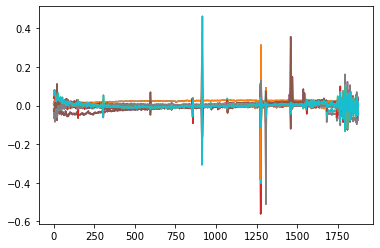

In [91]:
plt.plot()
for i in range(n_comp):
    plt.plot(engev[i,:])
    plt.plot(engev[i,:])
    print('eng values',i,':',evals[i])

In [93]:
recon.shape

(5616, 1877)

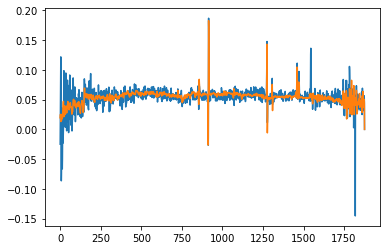

In [94]:
plt.plot(data2d[2000,:])
plt.plot(recon[2000,:])